 # MVO

[*********************100%***********************]  5 of 5 completed

Optimal Portfolio Weights:
AAPL: 0.0776
MSFT: 0.0000
GOOGL: 0.8263
AMZN: 0.0000
TSLA: 0.0960

Expected Portfolio Return: 0.1213
Portfolio Volatility (Risk): 0.0196


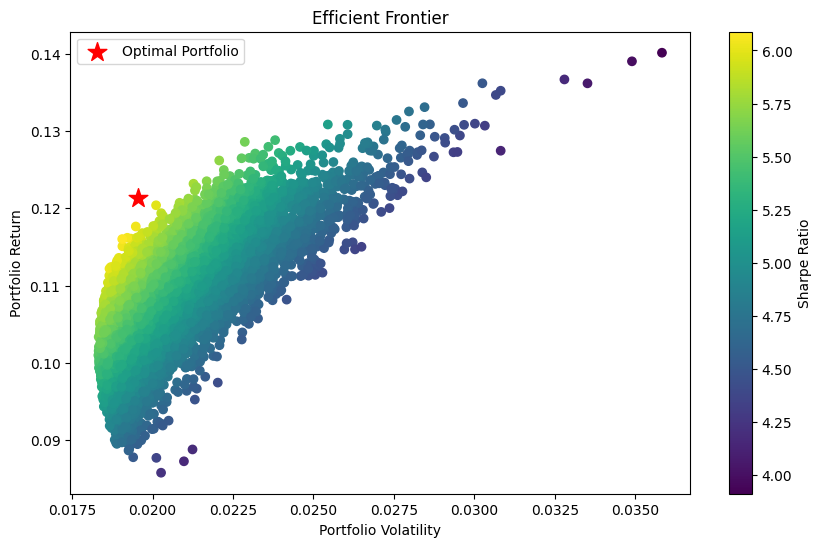

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Define tickers of the assets you want to analyze
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download historical price data from Yahoo Finance (for covariance matrix)
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns for the covariance matrix (we won't use expected returns from historical data)
returns = data.pct_change().dropna()
cov_matrix = returns.cov()

# Function to compute portfolio performance (return and risk)
def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Function to minimize (negative Sharpe ratio, assuming risk-free rate is 0)
def negative_sharpe_ratio(weights, expected_returns, cov_matrix):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    return -portfolio_return / portfolio_volatility

# Constraints: Sum of weights must be 1 (full investment)
def check_sum(weights):
    return np.sum(weights) - 1

# User-defined list of expected returns for each asset
# Example: [Expected return for AAPL, Expected return for MSFT, Expected return for GOOGL, Expected return for AMZN, Expected return for TSLA]
expected_returns = [0.10, 0.08, 0.12, 0.09, 0.15]  # Replace this list with your own values

# Convert the list of expected returns to a numpy array for computation
expected_returns = np.array(expected_returns)

# Initial guess for weights (equal allocation)
initial_weights = np.ones(len(tickers)) / len(tickers)

# Bounds for weights: between 0 and 1
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Optimization to find the optimal weights that maximize the Sharpe ratio
constraints = ({'type': 'eq', 'fun': check_sum})

optimal_results = minimize(negative_sharpe_ratio, initial_weights, args=(expected_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal weights and portfolio performance
optimal_weights = optimal_results.x
optimal_return, optimal_volatility = portfolio_performance(optimal_weights, expected_returns, cov_matrix)

# Print optimal portfolio weights and performance
print("\nOptimal Portfolio Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

print(f"\nExpected Portfolio Return: {optimal_return:.4f}")
print(f"Portfolio Volatility (Risk): {optimal_volatility:.4f}")

# Plot the Efficient Frontier
def plot_efficient_frontier(expected_returns, cov_matrix, num_portfolios=10000):
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)  # Normalize weights to sum to 1
        
        portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = portfolio_return / portfolio_volatility  # Sharpe ratio
    
    return results

# Generate random portfolios for efficient frontier plot
results = plot_efficient_frontier(expected_returns, cov_matrix)

# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')

# Highlight the optimal portfolio (maximum Sharpe ratio)
plt.scatter(optimal_volatility, optimal_return, color='red', marker='*', s=200, label="Optimal Portfolio")
plt.legend(loc='upper left')
plt.show()


[*********************100%***********************]  5 of 5 completed
[0.2 0.2 0.2 0.2 0.2]
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))


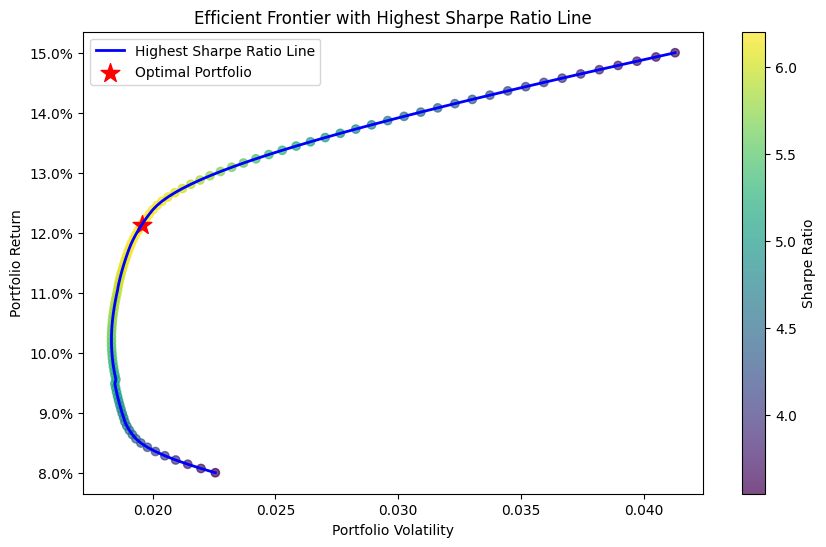

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.ticker as mtick

# Define tickers of the assets you want to analyze
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download historical price data from Yahoo Finance (for covariance matrix)
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns for the covariance matrix (we won't use expected returns from historical data)
returns = data.pct_change().dropna()
cov_matrix = returns.cov()

# Function to compute portfolio performance (return and risk)
def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Function to minimize (negative Sharpe ratio, assuming risk-free rate is 0)
def negative_sharpe_ratio(weights, expected_returns, cov_matrix):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    return -portfolio_return / portfolio_volatility

# Constraints: Sum of weights must be 1 (full investment)
def check_sum(weights):
    return np.sum(weights) - 1

# User-defined list of expected returns for each asset
expected_returns = [0.10, 0.08, 0.12, 0.09, 0.15]  # Replace this list with your own values
expected_returns = np.array(expected_returns)

# Initial guess for weights (equal allocation)
# initial_weights = np.ones(len(tickers)) / len(tickers)
print(initial_weights)
# Bounds for weights: between 0 and 1
bounds = tuple((0, 1) for _ in range(len(tickers)))
print(bounds)

# Optimization to find the optimal weights that maximize the Sharpe ratio
constraints = ({'type': 'eq', 'fun': check_sum})


# Function to find the portfolio with the minimum risk for a given target return
def min_volatility_for_return(target_return, expected_returns, cov_matrix):
    def objective(weights):
        portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
        return portfolio_volatility
    
    # Constraints for the optimization
    def return_constraint(weights):
        portfolio_return, _ = portfolio_performance(weights, expected_returns, cov_matrix)
        return portfolio_return - target_return
    
    constraints = ({'type': 'eq', 'fun': return_constraint},
                   {'type': 'eq', 'fun': check_sum})
    
    # Initial guess: equal allocation
    initial_weights = np.ones(len(tickers)) / len(tickers)
    
    # Perform optimization to minimize volatility while achieving the target return
    result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
    return result.x  # Return the optimized weights

# Generate the Efficient Frontier and calculate the highest Sharpe ratio points
target_returns = np.linspace(min(expected_returns), max(expected_returns), 100)  # Range of target returns
sharpe_ratios = []
volatilities = []
returns_for_sharpe = []

for target_return in target_returns:
    optimal_weights = min_volatility_for_return(target_return, expected_returns, cov_matrix)
    portfolio_return, portfolio_volatility = portfolio_performance(optimal_weights, expected_returns, cov_matrix)
    sharpe_ratio = portfolio_return / portfolio_volatility  # Sharpe ratio
    
    sharpe_ratios.append(sharpe_ratio)
    volatilities.append(portfolio_volatility)
    returns_for_sharpe.append(portfolio_return)

# Plot the Efficient Frontier with the line through the highest Sharpe ratio points
plt.figure(figsize=(10, 6))

# Scatter plot of random portfolios (as before, not used here but left for context)
plt.scatter(volatilities, returns_for_sharpe, c=sharpe_ratios, cmap='viridis', marker='o', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier with Highest Sharpe Ratio Line')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Plot the line through the highest Sharpe ratio points
plt.plot(volatilities, returns_for_sharpe, color='blue', lw=2, label="Highest Sharpe Ratio Line")

# Highlight the optimal portfolio (maximum Sharpe ratio)
plt.scatter(optimal_volatility, optimal_return, color='red', marker='*', s=200, label="Optimal Portfolio")

# Show the plot with legend
plt.legend(loc='upper left')
plt.show()




# Working Space

### 1. Consolidated Optimisation Function Version 1.0

[*********************100%***********************]  5 of 5 completed

Optimal Portfolio Weights:
SPY: 0.0000
QQQ: 0.3260
VWO: 0.0000
GLD: 0.3059
BNDX: 0.3681

Expected Portfolio Return: 0.1054
Portfolio Volatility (Risk): 0.0057
Realised Vol: 0.57%


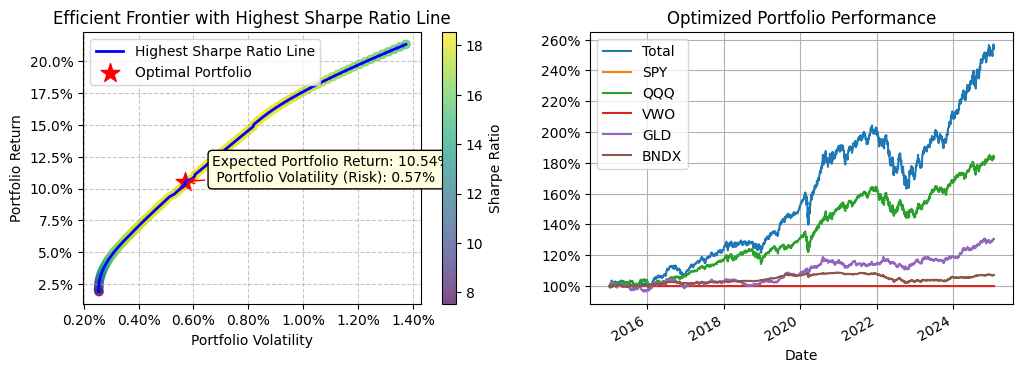

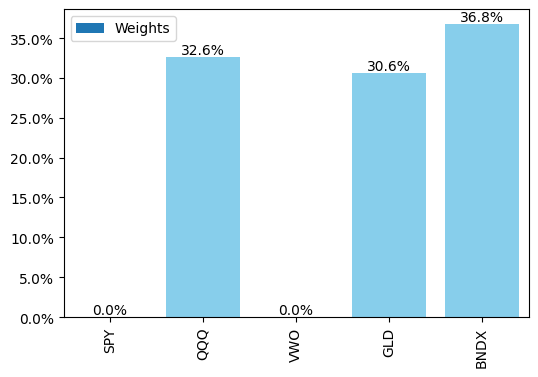

<AxesSubplot: title={'center': 'Optimized Portfolio Performance'}, xlabel='Date'>

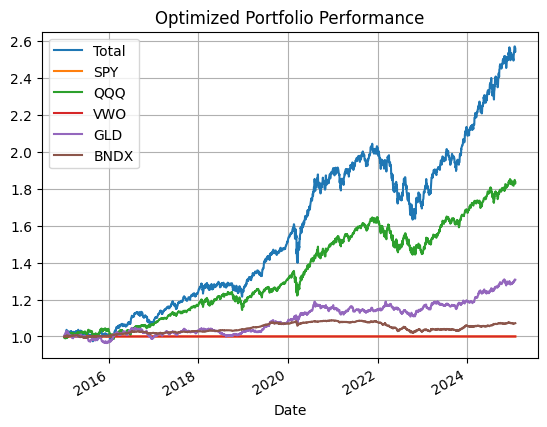

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.ticker as mtick

from datetime import datetime

# Get today's date
today = datetime.today()

# Format the date as "YYYY-MM-DD"
today = today.strftime("%Y-%m-%d")

def optimise_portfolio(tickers,start,end=today,lst_tuple_weight_bounds='',b_return_input = False,lst_expected_returns=[]):
    # ---------------------------------------------------------------------------- #
    #                                   Data Prep                                  #
    # ---------------------------------------------------------------------------- #
    
    #! ---------------------------- Change to bloomberg --------------------------- #
    
    # Download historical price data from Yahoo Finance (for covariance matrix)
    data = yf.download(tickers, start=start, end=end)['Adj Close']
    data = data[tickers]
    # print(data.columns)
    # print(data.tail())
    #! ------------------------------------ End ----------------------------------- #

    # Calculate daily returns for the covariance matrix (we won't use expected returns from historical data)
    returns = data.pct_change().dropna()
    cov_matrix = returns.cov()
    if b_return_input == True:
        expected_returns = np.array(lst_expected_returns)

    else:
        expected_returns = returns.mean()
        expected_returns = (1 + expected_returns) ** 252 - 1

    # print(expected_returns)
    # Function to compute portfolio performance (return and risk)
    def portfolio_performance(weights, expected_returns, cov_matrix):
        portfolio_return = np.sum(weights * expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return portfolio_return, portfolio_volatility

    # ---------------------------------------------------------------------------- #
    #                            Optimization Parameters                           #
    # ---------------------------------------------------------------------------- #

    # Function to minimize (negative Sharpe ratio, assuming risk-free rate is 0)
    def negative_sharpe_ratio(weights, expected_returns, cov_matrix):
        portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
        return -portfolio_return / portfolio_volatility

    # ---------------------------------------------------------------------------- #
    #                                  Constraints                                 #
    # ---------------------------------------------------------------------------- #

    # Constraints: Sum of weights must be 1 (full investment)
    def check_sum(weights):
        return np.sum(weights) - 1
    
    # Optimization to find the optimal weights that maximize the Sharpe ratio
    constraints = [{'type': 'eq', 'fun': check_sum,}]

    # Example: Group constraints (e.g., Equities = 60%-80%)
    equities = [0, 1,2,]  # Asset indices for equities
    group_constraints = [
        {'type': 'ineq', 'fun': lambda w: np.sum(w[equities]) - 0.7},  # Equities >= 60%
        {'type': 'ineq', 'fun': lambda w: 0.8 - np.sum(w[equities])},  # Equities <= 80%
        {'type': 'eq', 'fun': check_sum,} # Weights = 100%
    ]

    

    
    # ------------------------------- Weight limits ------------------------------ #
    # Bounds for weights: between 0 and 1

    if lst_tuple_weight_bounds != '':
        bounds = lst_tuple_weight_bounds
    else:
        bounds = tuple((0, 1) for _ in range(len(tickers)))

    
    # ---------------------------------------------------------------------------- #
    #                             Optimization Process                             #
    # ---------------------------------------------------------------------------- #

    # # Initial guess for weights (equal allocation)
    initial_weights = np.ones(len(tickers)) / len(tickers)

    # Function to find the portfolio with the minimum risk for a given target return
    def min_volatility_for_return(target_return, expected_returns, cov_matrix):
        def objective(weights):
            portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
            return portfolio_volatility
        
        # Constraints for the optimization
        def return_constraint(weights):
            portfolio_return, _ = portfolio_performance(weights, expected_returns, cov_matrix)
            return portfolio_return - target_return
        
        constraints = ({'type': 'eq', 'fun': return_constraint},
                    {'type': 'eq', 'fun': check_sum})
        
        # Initial guess: equal allocation
        initial_weights = np.ones(len(tickers)) / len(tickers)
        
        # Perform optimization to minimize volatility while achieving the target return
        result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints,method="SLSQP")
        # result = minimize(objective, initial_weights, bounds=bounds, constraints=group_constraints,method="SLSQP")
        
        
        return result.x  # Return the optimized weights

    # ---------------------------------------------------------------------------- #
    #                          Getting points for plotting                         #
    # ---------------------------------------------------------------------------- #
    
    # Generate the Efficient Frontier and calculate the highest Sharpe ratio points
    target_returns = np.linspace(min(expected_returns), max(expected_returns), 100)  # Range of target returns
    sharpe_ratios = []
    volatilities = []
    returns_for_sharpe = []
    
    df_final_results = pd.DataFrame(index= tickers)

    for target_return in target_returns:
        optimal_weights = min_volatility_for_return(target_return, expected_returns, cov_matrix)
        portfolio_return, portfolio_volatility = portfolio_performance(optimal_weights, expected_returns, cov_matrix)
        sharpe_ratio = portfolio_return / portfolio_volatility  # Sharpe ratio
        
        sharpe_ratios.append(sharpe_ratio)
        volatilities.append(portfolio_volatility)
        returns_for_sharpe.append(portfolio_return)

        df_final_results[round(sharpe_ratio,2)] = optimal_weights


    # print(df_final_results)

    # --------------- Finding the point with the max sharpe ratio. --------------- #
    max_sharpe = max(sharpe_ratios)
    weights = np.array(df_final_results[round(max_sharpe,2)])
    optimal_return,optimal_volatility = portfolio_performance(weights,expected_returns,cov_matrix)

    # Print optimal portfolio weights and performance
    print("\nOptimal Portfolio Weights:")
    for ticker, weight in zip(tickers, weights):
        print(f"{ticker}: {weight:.4f}")
        
    print(f"\nExpected Portfolio Return: {optimal_return:.4f}")
    print(f"Portfolio Volatility (Risk): {optimal_volatility:.4f}")

    # ---------------------------------------------------------------------------- #
    #                                   Plotting                                   #
    # ---------------------------------------------------------------------------- #
    
    # Plot the Efficient Frontier with the line through the highest Sharpe ratio points
    # plt.figure(figsize=(10, 6))
    fig, axes = plt.subplots(1,2, figsize=(12, 4), sharex=False)

    # Scatter plot of random portfolios (as before, not used here but left for context)
    sc = axes[0].scatter(volatilities, returns_for_sharpe, c=sharpe_ratios, cmap='viridis', marker='o', alpha=0.7)
    cbar = fig.colorbar(sc,ax=axes[0],label='Sharpe Ratio')
    
    axes[0].grid(True,linestyle="--", alpha=0.7)
    axes[0].set_xlabel('Portfolio Volatility')
    axes[0].set_ylabel('Portfolio Return')
    axes[0].set_title('Efficient Frontier with Highest Sharpe Ratio Line')
    axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axes[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Plot the line through the highest Sharpe ratio points
    axes[0].plot(volatilities, returns_for_sharpe, color='blue', lw=2, label="Highest Sharpe Ratio Line")

    # Highlight the optimal portfolio (maximum Sharpe ratio)
    axes[0].scatter(optimal_volatility, optimal_return, color='red', marker='*', s=200, label="Optimal Portfolio")
    
    # Add annotation with a box
    annotation_text1 =f"Expected Portfolio Return: {optimal_return*100:.2f}%"
    annotation_text = annotation_text1 \
                        + f"\n Portfolio Volatility (Risk): {optimal_volatility*100:.2f}%"

    axes[0].annotate(
        annotation_text,
        xy=(optimal_volatility, optimal_return),  # Point to annotate
        xytext=(optimal_volatility +0.001, optimal_return),  # Position of text
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow"),  # Box styling
        arrowprops=dict(arrowstyle="->", color="red"),  # Arrow styling
        fontsize=10,
        color="black"
    )
    
    # Show the plot with legend
    axes[0].legend(loc='upper left')
    

    # ---------------------------------------------------------------------------- #
    #                      Plot optimal portfolio performance                      #
    # ---------------------------------------------------------------------------- #

    
    df_opti_perf = returns * weights
    df_final = pd.DataFrame()
    df_final['Total'] = df_opti_perf.sum(axis=1)
    df_final['Total']  += 1
    df_final['Total'] = df_final['Total'].cumprod()
    f_realised_vol = df_final['Total'].pct_change().std() * 100
    print(f"Realised Vol: {f_realised_vol:.2f}%")

    #! ------------------------------ Export Returns ------------------------------ #
    # df_final['Total'].pct_change().to_excel('df_final_returns.xlsx')

    df_opti_perf += 1
    df_opti_perf = df_opti_perf.cumprod()
    df_final_plot = pd.concat([df_final,df_opti_perf],axis=1)
    df_final_plot.plot(ax=axes[1],title='Optimized Portfolio Performance',grid=True)
    axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # ---------------------------------------------------------------------------- #
    #                               Plotting Weights                               #
    # ---------------------------------------------------------------------------- #
    fig2, axes2 = plt.subplots(1,1, figsize=(6, 4), sharex=False)

    df_weights = pd.DataFrame(weights,columns=['Weights'],index=tickers)
    df_weights.plot.bar(ax=axes2)
    axes2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    bars = axes2.bar(df_weights.index, df_weights['Weights'], color='skyblue')

    # Annotate the value at the top of each bar
    for bar in bars:
        height = bar.get_height()  # Get the height of the bar
        axes2.annotate(f'{height*100:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 0),  # Offset text above the bar
                    textcoords="offset points", 
                    ha='center', 
                    va='bottom',  # Align text to the bottom of the annotation point
                    color='black')

    plt.show()

    return returns,weights

weight_limits=[(0,1),(0,1),(0,1),(0,1),(0,1)]
df_r,df_w = optimise_portfolio(['SPY','QQQ','VWO','GLD','BNDX'],start="2015-01-01",end=today,lst_tuple_weight_bounds=weight_limits,
                    b_return_input = False,lst_expected_returns=[0.12,0.05,0.20])


# print(df_r.head())
# print(df_w)

df_p = df_r * df_w
# print(df_p.head())

df_final = pd.DataFrame()
df_final['Total'] = df_p.sum(axis=1)
df_final['Total']  += 1
df_final['Total'] = df_final['Total'].cumprod()
# df_final['Total'].plot(grid=True,title='Optimized Portfolio Performance')

df_p += 1
df_p2 = df_p.cumprod()
# df_p2.plot(title = 'Contribution',grid=True)

df_final_plot = pd.concat([df_final,df_p2],axis=1)
df_final_plot.plot(grid=True,title='Optimized Portfolio Performance')

### MVO Function ver 2.0

[*********************100%***********************]  5 of 5 completed

Optimal Portfolio Weights:
SPY: 0.0000
QQQ: 0.3260
VWO: 0.0000
GLD: 0.3059
BNDX: 0.3681

Expected Portfolio Return: 0.1054
Portfolio Volatility (Risk): 0.0057
Realised Vol: 0.57%


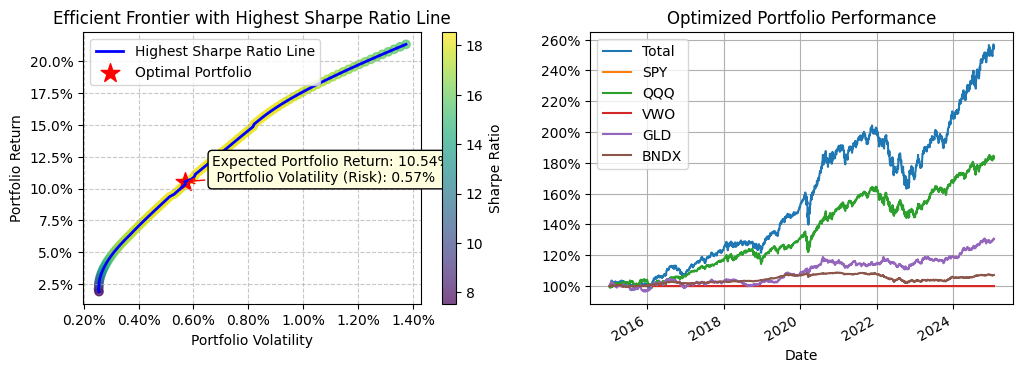

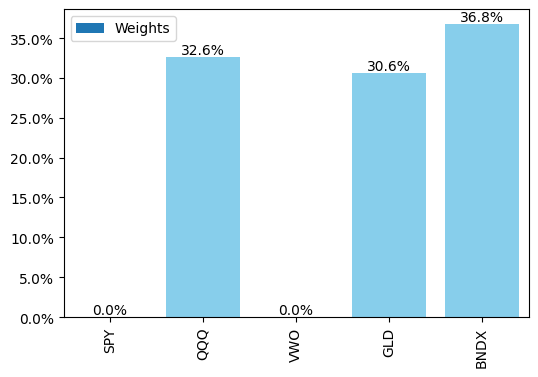

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.ticker as mtick

from datetime import datetime

# Get today's date
today = datetime.today()

# Format the date as "YYYY-MM-DD"
today = today.strftime("%Y-%m-%d")

def optimise_portfolio(tickers,start,end=today,lst_tuple_weight_bounds='',b_return_input = False,lst_expected_returns=[]):
    # ---------------------------------------------------------------------------- #
    #                                   Data Prep                                  #
    # ---------------------------------------------------------------------------- #
    
    #! ---------------------------- Change to bloomberg --------------------------- #
    
    # Download historical price data from Yahoo Finance (for covariance matrix)
    data = yf.download(tickers, start=start, end=end)['Adj Close']
    data = data[tickers]
    # print(data.columns)
    # print(data.tail())
    #! ------------------------------------ End ----------------------------------- #

    # Calculate daily returns for the covariance matrix (we won't use expected returns from historical data)
    returns = data.pct_change().dropna()
    cov_matrix = returns.cov()
    if b_return_input == True:
        expected_returns = np.array(lst_expected_returns)

    else:
        expected_returns = returns.mean()
        expected_returns = (1 + expected_returns) ** 252 - 1

    # print(expected_returns)
    # Function to compute portfolio performance (return and risk)
    def portfolio_performance(weights, expected_returns, cov_matrix):
        portfolio_return = np.sum(weights * expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return portfolio_return, portfolio_volatility

    # ---------------------------------------------------------------------------- #
    #                            Optimization Parameters                           #
    # ---------------------------------------------------------------------------- #

    # Function to minimize (negative Sharpe ratio, assuming risk-free rate is 0)
    def negative_sharpe_ratio(weights, expected_returns, cov_matrix):
        portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
        return -portfolio_return / portfolio_volatility

    # ---------------------------------------------------------------------------- #
    #                                  Constraints                                 #
    # ---------------------------------------------------------------------------- #

    # Constraints: Sum of weights must be 1 (full investment)
    def check_sum(weights):
        return np.sum(weights) - 1
    
    # Optimization to find the optimal weights that maximize the Sharpe ratio
    constraints = [{'type': 'eq', 'fun': check_sum,}]

    # Example: Group constraints (e.g., Equities = 60%-80%)
    equities = [0, 1,2,]  # Asset indices for equities
    group_constraints = [
        {'type': 'ineq', 'fun': lambda w: np.sum(w[equities]) - 0.7},  # Equities >= 60%
        {'type': 'ineq', 'fun': lambda w: 0.8 - np.sum(w[equities])},  # Equities <= 80%
        {'type': 'eq', 'fun': check_sum,} # Weights = 100%
    ]

    

    
    # ------------------------------- Weight limits ------------------------------ #
    # Bounds for weights: between 0 and 1

    if lst_tuple_weight_bounds != '':
        bounds = lst_tuple_weight_bounds
    else:
        bounds = tuple((0, 1) for _ in range(len(tickers)))

    
    # ---------------------------------------------------------------------------- #
    #                             Optimization Process                             #
    # ---------------------------------------------------------------------------- #

    # # Initial guess for weights (equal allocation)
    initial_weights = np.ones(len(tickers)) / len(tickers)

    # Function to find the portfolio with the minimum risk for a given target return
    def min_volatility_for_return(target_return, expected_returns, cov_matrix):
        def objective(weights):
            portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
            return portfolio_volatility
        
        # Constraints for the optimization
        def return_constraint(weights):
            portfolio_return, _ = portfolio_performance(weights, expected_returns, cov_matrix)
            return portfolio_return - target_return
        
        constraints = ({'type': 'eq', 'fun': return_constraint},
                    {'type': 'eq', 'fun': check_sum})
        
        # Initial guess: equal allocation
        initial_weights = np.ones(len(tickers)) / len(tickers)
        
        # Perform optimization to minimize volatility while achieving the target return
        result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints,method="SLSQP")
        # result = minimize(objective, initial_weights, bounds=bounds, constraints=group_constraints,method="SLSQP")
        
        
        return result.x  # Return the optimized weights

    # ---------------------------------------------------------------------------- #
    #                          Getting points for plotting                         #
    # ---------------------------------------------------------------------------- #
    
    # Generate the Efficient Frontier and calculate the highest Sharpe ratio points
    target_returns = np.linspace(min(expected_returns), max(expected_returns), 100)  # Range of target returns
    sharpe_ratios = []
    volatilities = []
    returns_for_sharpe = []
    
    df_final_results = pd.DataFrame(index= tickers)

    for target_return in target_returns:
        optimal_weights = min_volatility_for_return(target_return, expected_returns, cov_matrix)
        portfolio_return, portfolio_volatility = portfolio_performance(optimal_weights, expected_returns, cov_matrix)
        sharpe_ratio = portfolio_return / portfolio_volatility  # Sharpe ratio
        
        sharpe_ratios.append(sharpe_ratio)
        volatilities.append(portfolio_volatility)
        returns_for_sharpe.append(portfolio_return)

        df_final_results[round(sharpe_ratio,2)] = optimal_weights


    # print(df_final_results)

    # --------------- Finding the point with the max sharpe ratio. --------------- #
    max_sharpe = max(sharpe_ratios)
    weights = np.array(df_final_results[round(max_sharpe,2)])
    optimal_return,optimal_volatility = portfolio_performance(weights,expected_returns,cov_matrix)

    # Print optimal portfolio weights and performance
    print("\nOptimal Portfolio Weights:")
    for ticker, weight in zip(tickers, weights):
        print(f"{ticker}: {weight:.4f}")
        
    print(f"\nExpected Portfolio Return: {optimal_return:.4f}")
    print(f"Portfolio Volatility (Risk): {optimal_volatility:.4f}")

    # ---------------------------------------------------------------------------- #
    #                                   Plotting                                   #
    # ---------------------------------------------------------------------------- #
    
    # Plot the Efficient Frontier with the line through the highest Sharpe ratio points
    # plt.figure(figsize=(10, 6))
    fig, axes = plt.subplots(1,2, figsize=(12, 4), sharex=False)

    # Scatter plot of random portfolios (as before, not used here but left for context)
    sc = axes[0].scatter(volatilities, returns_for_sharpe, c=sharpe_ratios, cmap='viridis', marker='o', alpha=0.7)
    cbar = fig.colorbar(sc,ax=axes[0],label='Sharpe Ratio')
    
    axes[0].grid(True,linestyle="--", alpha=0.7)
    axes[0].set_xlabel('Portfolio Volatility')
    axes[0].set_ylabel('Portfolio Return')
    axes[0].set_title('Efficient Frontier with Highest Sharpe Ratio Line')
    axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axes[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Plot the line through the highest Sharpe ratio points
    axes[0].plot(volatilities, returns_for_sharpe, color='blue', lw=2, label="Highest Sharpe Ratio Line")

    # Highlight the optimal portfolio (maximum Sharpe ratio)
    axes[0].scatter(optimal_volatility, optimal_return, color='red', marker='*', s=200, label="Optimal Portfolio")
    
    # Add annotation with a box
    annotation_text1 =f"Expected Portfolio Return: {optimal_return*100:.2f}%"
    annotation_text = annotation_text1 \
                        + f"\n Portfolio Volatility (Risk): {optimal_volatility*100:.2f}%"

    axes[0].annotate(
        annotation_text,
        xy=(optimal_volatility, optimal_return),  # Point to annotate
        xytext=(optimal_volatility +0.001, optimal_return),  # Position of text
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow"),  # Box styling
        arrowprops=dict(arrowstyle="->", color="red"),  # Arrow styling
        fontsize=10,
        color="black"
    )
    
    # Show the plot with legend
    axes[0].legend(loc='upper left')
    

    # ---------------------------------------------------------------------------- #
    #                      Plot optimal portfolio performance                      #
    # ---------------------------------------------------------------------------- #

    
    df_opti_perf = returns * weights
    df_final = pd.DataFrame()
    df_final['Total'] = df_opti_perf.sum(axis=1)
    df_final['Total']  += 1
    df_final['Total'] = df_final['Total'].cumprod()
    f_realised_vol = df_final['Total'].pct_change().std() * 100
    print(f"Realised Vol: {f_realised_vol:.2f}%")

    #! ------------------------------ Export Returns ------------------------------ #
    # df_final['Total'].pct_change().to_excel('df_final_returns.xlsx')

    df_opti_perf += 1
    df_opti_perf = df_opti_perf.cumprod()
    df_final_plot = pd.concat([df_final,df_opti_perf],axis=1)
    df_final_plot.plot(ax=axes[1],title='Optimized Portfolio Performance',grid=True)
    axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # ---------------------------------------------------------------------------- #
    #                               Plotting Weights                               #
    # ---------------------------------------------------------------------------- #
    fig2, axes2 = plt.subplots(1,1, figsize=(6, 4), sharex=False)

    df_weights = pd.DataFrame(weights,columns=['Weights'],index=tickers)
    df_weights.plot.bar(ax=axes2)
    axes2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    bars = axes2.bar(df_weights.index, df_weights['Weights'], color='skyblue')

    # Annotate the value at the top of each bar
    for bar in bars:
        height = bar.get_height()  # Get the height of the bar
        axes2.annotate(f'{height*100:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 0),  # Offset text above the bar
                    textcoords="offset points", 
                    ha='center', 
                    va='bottom',  # Align text to the bottom of the annotation point
                    color='black')

    plt.show()

    return returns,weights

weight_limits=[(0,1),(0,1),(0,1),(0,1),(0,1)]
df_r,df_w = optimise_portfolio(['SPY','QQQ','VWO','GLD','BNDX'],start="2015-01-01",end=today,lst_tuple_weight_bounds=weight_limits,
                    b_return_input = False,lst_expected_returns=[0.12,0.05,0.20])


<AxesSubplot: title={'center': 'Optimized Portfolio Performance'}, xlabel='Date'>

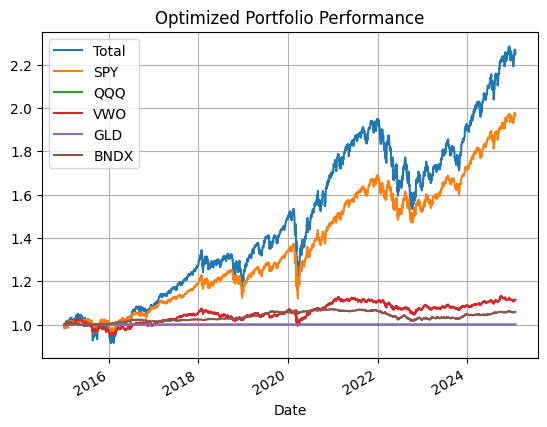

In [4]:
# print(df_r.head())
# print(df_w)

df_p = df_r * df_w
# print(df_p.head())

df_final = pd.DataFrame()
df_final['Total'] = df_p.sum(axis=1)
df_final['Total']  += 1
df_final['Total'] = df_final['Total'].cumprod()
# df_final['Total'].plot(grid=True,title='Optimized Portfolio Performance')

df_p += 1
df_p2 = df_p.cumprod()
# df_p2.plot(title = 'Contribution',grid=True)

df_final_plot = pd.concat([df_final,df_p2],axis=1)
df_final_plot.plot(grid=True,title='Optimized Portfolio Performance')

2. Adding in Excel File reading

In [5]:
# import numpy as np
# import pandas as pd
# import yfinance as yf
# import matplotlib.pyplot as plt
# from scipy.optimize import minimize
# import matplotlib.ticker as mtick


# class CT_optimiser(addr_file):

#     def __init__(self,addr_file):
#         df_expected_returns = pd.read_excel()


